* [Youtube Video Referenced](https://youtu.be/3y9XVlk9cDA?t=444)
* Dataset from [404X](https://www.kaggle.com/datasets/lasindudemel/vehicle-stolen-dataset)

# [Naive- Bayes Classification](https://www.google.com/url?sa=i&url=https%3A%2F%2Fblog.clairvoyantsoft.com%2Fmlmuse-naivety-in-naive-bayes-classifiers-9c7f6ba952bf&psig=AOvVaw2pdAB90bH_n_5Pe4hN6Re3&ust=1692577296372000&source=images&cd=vfe&opi=89978449&ved=0CBEQjhxqFwoTCKj6nfr76YADFQAAAAAdAAAAABAI)

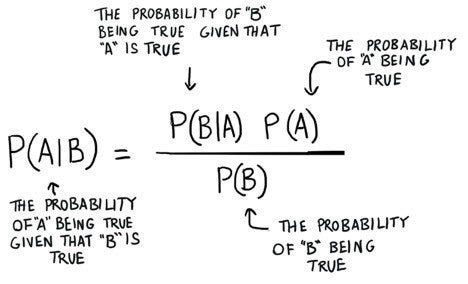

Classifies data points using Bayes' theorem as seen in the above image. This uses probability to best classify what the data points should be grouped under.

## 1) Import Essentials

In [1]:
import pandas as pd
import numpy as np

## 2) Data Cleaning

In [2]:
pd_cars = pd.read_csv("vehicle_stolen_dataset_ with_headers.csv")

pd_cars

,number_plate,brand,color,time,stoled
0,N001,BMW,black,night,yes
1,N002,Audi,black,night,no
2,N003,NISSAN,black,night,yes
3,N004,VEGA,red,day,yes
4,N005,BMW,blue,day,no
5,N006,Audi,black,day,yes
6,N007,VEGA,red,night,no
7,N008,Audi,blue,day,yes
8,N009,VEGA,black,day,yes
9,N010,NISSAN,blue,day,no


## 2a) Remove number_plate column

In [3]:
pd_cars = pd_cars.drop(["number_plate"],axis=1)

pd_cars

,brand,color,time,stoled
0,BMW,black,night,yes
1,Audi,black,night,no
2,NISSAN,black,night,yes
3,VEGA,red,day,yes
4,BMW,blue,day,no
5,Audi,black,day,yes
6,VEGA,red,night,no
7,Audi,blue,day,yes
8,VEGA,black,day,yes
9,NISSAN,blue,day,no


## 2b) Find all unique values under each column

In [4]:
#Find all unique values under columns of interest

#car types

dif_car = pd_cars["brand"].unique()
dif_car



array(['BMW', 'Audi', 'NISSAN', 'VEGA'], dtype=object)

In [5]:
#colors

dif_color_car = pd_cars["color"].unique()
dif_color_car

array(['black', 'red', 'blue'], dtype=object)

In [6]:
#time
dif_time = pd_cars["time"].unique()
dif_time

array(['night', 'day'], dtype=object)

## 2c) Change datapoints to numerical values via dictionary

In [7]:
#brand

brand_conv = {
    'BMW' : 1, 
    'Audi' : 2, 
    'NISSAN' : 3, 
    'VEGA' : 4
}

#color
color_conv = {
    'black' : 0,
    'red' : 1, 
    'blue' : 2
}


#time of day
time_day_conv = {
    'night':1, 
    'day' :0
}

#stolen
stolen_conv = {
    'yes' : 1,
    'no' : 0
}

#make changes

pd_cars["brand"] = pd_cars["brand"].map(brand_conv)
pd_cars["color"] = pd_cars["color"].map(color_conv)
pd_cars["time"] = pd_cars["time"].map(time_day_conv)
pd_cars["stoled"] = pd_cars["stoled"].map(stolen_conv)

#save as new csv
pd_cars.to_csv("new_vehicle_stolen_dataset_ with_headers.csv", index = False)

#open new csv 

pd_cars_new = pd.read_csv("new_vehicle_stolen_dataset_ with_headers.csv")

pd_cars_new

,brand,color,time,stoled
0,1,0,1,1
1,2,0,1,0
2,3,0,1,1
3,4,1,0,1
4,1,2,0,0
5,2,0,0,1
6,4,1,1,0
7,2,2,0,1
8,4,0,0,1
9,3,2,0,0


## 3) Get independent variable (IV) separate from dependent variable (DV)

In [8]:
#get all labels for IV
Var_features = pd_cars_new[['brand','color','time']]

#variable for IV and DV
IV_cars = np.asarray(Var_features)
DV_cars = np.asarray(pd_cars_new["stoled"])

#display array of all variables -> ready to put in model
IV_cars[:4]


array([[1, 0, 1],
       [2, 0, 1],
       [3, 0, 1],
       [4, 1, 0]], dtype=int64)

## 4) Set up test and training dataset

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(IV_cars,DV_cars,test_size = .35,random_state = 42)

#random state = how random the splitting of data is

## 5) Run Model

In [10]:
from sklearn.naive_bayes import GaussianNB
gauss_naiveB = GaussianNB()
gauss_naiveB.fit(X_train,y_train) #training model

y_pred = gauss_naiveB.predict(X_test)
y_pred

#model predicts using the test size if the car was stolen or not

array([1, 1, 1, 1, 1, 1, 0], dtype=int64)

## 6) Evaluate Model

### 6a) compare the predicted value with the correct value for the test size 

In [11]:
#iterate through each of test items
stolen_values = ["yes","no"]

for i in range (len(y_pred)):
    print("Predicted:", stolen_values[y_pred[i]], "| Data of actual test:", [X_test[i]], "| Actual:", stolen_values[y_test[i]])
    
    #the data is an array with the independent variables as their corresponding numerical values 
    #as defined in the dictionary made 

Predicted: no | Data of actual test: [array([1, 0, 1], dtype=int64)] | Actual: no
Predicted: no | Data of actual test: [array([3, 0, 0], dtype=int64)] | Actual: no
Predicted: no | Data of actual test: [array([2, 2, 1], dtype=int64)] | Actual: no
Predicted: no | Data of actual test: [array([2, 0, 1], dtype=int64)] | Actual: yes
Predicted: no | Data of actual test: [array([4, 0, 0], dtype=int64)] | Actual: no
Predicted: no | Data of actual test: [array([2, 0, 0], dtype=int64)] | Actual: no
Predicted: yes | Data of actual test: [array([3, 1, 0], dtype=int64)] | Actual: yes


### 6b) Confusion Matrix - Accuracy, Recall, Precision

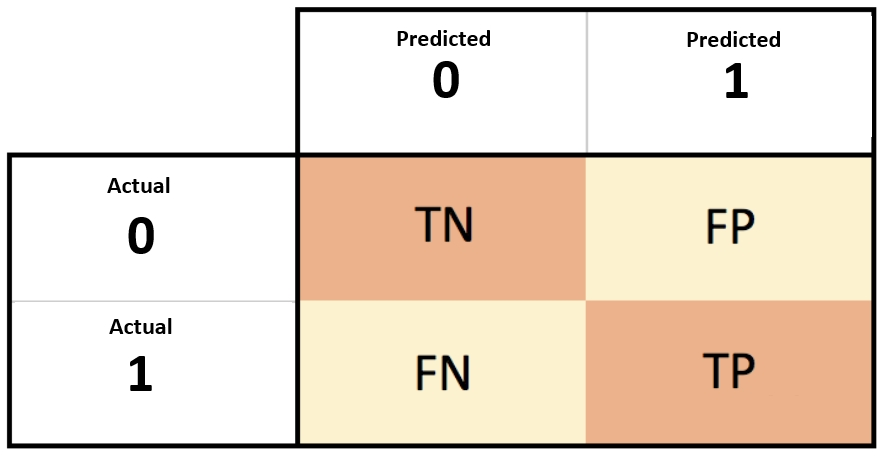

This shows how the model correctly/incorrectly categorized data it predicted and how it compares to the actual label for the data used. [Photo credit](https://www.google.com/url?sa=i&url=https%3A%2F%2Fsubscription.packtpub.com%2Fbook%2Fdata%2F9781838555078%2F6%2Fch06lvl1sec34%2Fconfusion-matrix&psig=AOvVaw21MZb5-XXxYMPX-_Z4cBEm&ust=1690837416388000&source=images&cd=vfe&opi=89978449&ved=0CBAQjRxqFwoTCNi1vq6qt4ADFQAAAAAdAAAAABAD)

In [14]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred, labels= [0,1])

#labels are for the model to label data as  (not stolen) or 1 (stolen)

array([[1, 1],
       [0, 5]], dtype=int64)

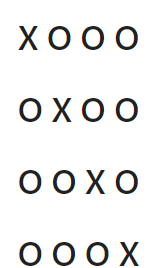

Any spot where X is means the model predicted correctly for x number of data points

## 6c) Classification Report

* This tells us accuracy, precision, recall, F1 score, macro and weighted avg.
* The support column shows how many items actually belong in a specific category

F1 score

* the closer value is to 1, the better the model
* calculate using formula: 2* (Precision * Recall)/ (Precision + Recall)

In [16]:

from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred, target_names=["yes","no"]))

#use print function for better formatting

              precision    recall  f1-score   support

         yes       1.00      0.50      0.67         2
          no       0.83      1.00      0.91         5

    accuracy                           0.86         7
   macro avg       0.92      0.75      0.79         7
weighted avg       0.88      0.86      0.84         7

